# Second-Harmonic Nonlinear Electrochemical Impedance Spectroscopy: I. Analytical theory and equivalent circuit representations for planar and porous electrodes

### Yuefan Ji and Daniel T. Schwartz<br>*Department of Chemical Engineering & Clean Energy Institute,<br>University of Washington*

# Supplementary Notebook (Part I)

## List of Figures

### - [Figure 3. The Weakly Nonlinear Randles Circuit](#Figure-3.-The-Weakly-Nonlinear-Randles-Circuit)
### - [Figure 5. A porous electrode with no concentration effects in solution or solid](#Figure-5.-A-porous-electrode-with-no-concentration-effects-in-solution-or-solid)
### - [Figure 7. Weakly nonlinear response of a planar insertion electrode with bounded solid diffusion](#Figure-7.-Weakly-nonlinear-response-of-a-planar-insertion-electrode-with-bounded-solid-diffusion)
### - [Figure 9. Weakly nonlinear response of a porous insertion electrode with bounded solid diffusion](#Figure-9.-Weakly-nonlinear-response-of-a-porous-insertion-electrode-with-bounded-solid-diffusion)
### - [Figure 10. Signal Parity and Second Harmonic NLEIS for Two-Electrode Cells](#Figure-10.-Signal-Parity-and-Second-Harmonic-NLEIS-for-Two-Electrode-Cells)
### - [Supplementary Figure. Convergence of Transmission line model to porous electrode model](#Supplementary-Figure.-Convergence-of-Transmission-line-model-to-porous-electrode-model)


In [1]:
## editing system path to enable the load of the modified impedance.py with NLEIS toolbox
import os.path
import sys
current_dir = os.path.dirname(os.path.abspath('__file__'))

# Get the parent directory by moving up one level
parent_dir = os.path.dirname(current_dir)
# Add the parent directory to the Python path
sys.path.append(parent_dir)

In [2]:
##### basic package
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

##### NLEIS toolbox based on impedance.py
from impedance.models.circuits import CustomCircuit
from impedance.models.nleis import EISandNLEIS, NLEISCustomCircuit
from impedance.models.nleis.visualization import plot_nyquist,plot_first,plot_second

##### ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [3]:
def arrow(ax,x1,y1,x2,y2,x3,y3,connectionstyle):

    ax.annotate("",
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->", color='k',lw=3,
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle=connectionstyle,
                                ),
                )
    ax.text(x3,y3,'ω',size=18,weight='bold')
    return()

In [4]:
f = np.geomspace(1e-3, 1e4, num=200, endpoint=True)
point_1 = np.array([1e-3])
point_2 = np.array([1e-1])
point_3 = np.array([1e1])

# Figure 3. The Weakly Nonlinear Randles Circuit 

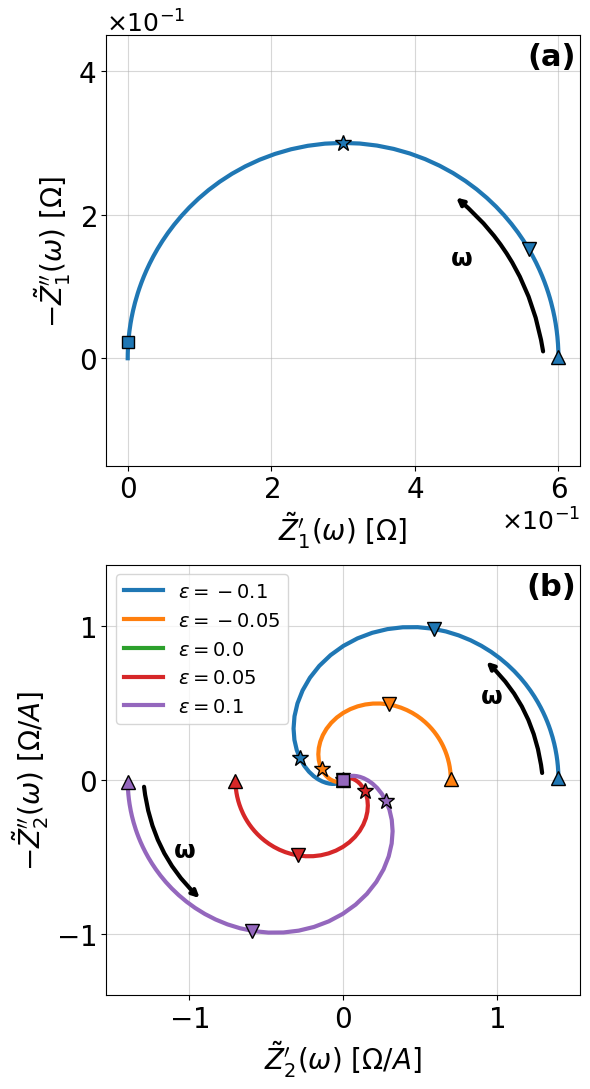

In [5]:
fig, ax = plt.subplots(2,1,figsize=(6,11))#12:6
c_code=0
Rpore = 0.6 # Ohms
Rct = 0.6 # Ohms
Cdl = 0.72 # F

circ_str_1 = 'p(R0,C0)'
circuit_1 = CustomCircuit(circ_str_1, constants={'R0':Rct,'C0':Cdl})
point_RC = np.array([1/(Rct*Cdl*2*np.pi)])

Z1 = circuit_1.predict(f)
Z1p1 = circuit_1.predict(point_1)
Z1p2 = circuit_1.predict(point_2)
Z1p3 = circuit_1.predict(point_3)
Z1p4 = circuit_1.predict(point_RC)

circ_str_2 = 'R0-RCOn0'
plot_first(ax[0], Z1, fmt='-',lw=3)
plot_first(ax[0], Z1p1, fmt='^',ms=10,color='C'+str(c_code),markeredgecolor='k')
plot_first(ax[0], Z1p2, fmt='v',ms=10,color='C'+str(c_code),markeredgecolor='k')
plot_first(ax[0], Z1p3, fmt='s',ms=8,color='C'+str(c_code),markeredgecolor='k')
plot_first(ax[0], Z1p4, fmt='*',ms=12,color='C'+str(c_code),markeredgecolor='k')

x1, y1 = .45, .23
x2, y2 = 0.58, 0
x3, y3 = .45, .13
connectionstyle="arc3,rad=0.2"
arrow(ax[0],x1,y1,x2,y2,x3,y3,connectionstyle)
for i in range (-10,11,5):
    e=i/100
    # circuit_2 = CustomCircuit(circ_str_2, constants={'R0':0,'RCn0_0':Rct,'RCn0_1':Cdl,'RCn0_2':e})
    circuit_2 = CustomCircuit(circ_str_2, constants={'R0':0,'RCOn0_0':Rct,'RCOn0_1':Cdl,'RCOn0_2':e})

    Z2 = circuit_2.predict(f)
    plot_second(ax[1], Z2, fmt='-',lw=3,label=r"$ ε = "+str(e)+"$")
    Z2p1 = circuit_2.predict(point_1)
    Z2p2 = circuit_2.predict(point_2)
    Z2p3 = circuit_2.predict(point_3)
    Z2p4 = circuit_2.predict(point_RC)

    plot_second(ax[1], Z2p1, fmt='^',ms=10,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[1], Z2p2, fmt='v',ms=10,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[1], Z2p3, fmt='s',ms=8,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[1], Z2p4, fmt='*',ms=12,color='C'+str(c_code),markeredgecolor='k')

    c_code +=1
x1, y1 = 0.9, .8
x2, y2 = 1.3, 0
x3, y3 = 0.9, .5
arrow(ax[1],x1,y1,x2,y2,x3,y3,connectionstyle)
x1, y1 = -0.9, -.8
x2, y2 = -1.3, 0
x3, y3 = -1.1, -.5
connectionstyle="arc3,rad=0.2"
arrow(ax[1],x1,y1,x2,y2,x3,y3,connectionstyle)
ax[0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0].transAxes, size=22, weight='bold')
ax[1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[1].transAxes, size=22, weight='bold')

plt.legend(fontsize=14)

plt.tight_layout()
plt.show()
# fig.savefig('figures/Figure3.png',dpi=300,bbox_inches='tight')
# mHz , kHz, 1/RC

# Figure 5. A porous electrode with no concentration effects in solution or solid

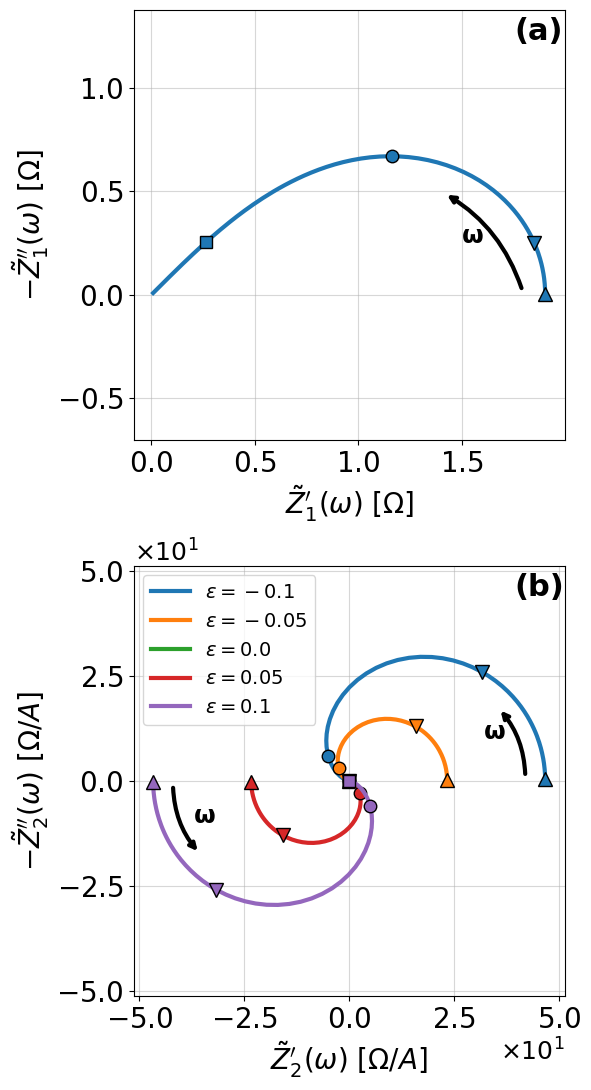

In [6]:
fig, ax = plt.subplots(2,1,figsize=(6,11))#12:6
c_code=0
Rpore = 6 # Ohms
Rct = 0.6 # Ohms
Cdl = 0.72 # F

circ_str_1 = 'R0-TPO0'
circ_str_2 = 'R0-TPOn0'

point_RC = np.array([np.sqrt(3)/(Rct*Cdl*2*np.pi)])

circuit_1 = CustomCircuit(circ_str_1, constants={'R0':0,'TPO0_0':Rpore,'TPO0_1':Rct,'TPO0_2':Cdl})
Z1 = circuit_1.predict(f)
Z1p1 = circuit_1.predict(point_1)
Z1p2 = circuit_1.predict(point_2)
Z1p3 = circuit_1.predict(point_3)
Z1p4 = circuit_1.predict(point_RC)

plot_first(ax[0], Z1, fmt='-',lw=3)
plot_first(ax[0], Z1p1, fmt='^',ms=10,color='C'+str(c_code),markeredgecolor='k')
plot_first(ax[0], Z1p2, fmt='v',ms=10,color='C'+str(c_code),markeredgecolor='k')
plot_first(ax[0], Z1p3, fmt='s',ms=8,color='C'+str(c_code),markeredgecolor='k')
plot_first(ax[0], Z1p4, fmt='o',ms=9,color='C'+str(c_code),markeredgecolor='k')

x1, y1 = 1.4, 0.5
x2, y2 = 1.8, 0
x3, y3 = 1.5, .25
connectionstyle="arc3,rad=0.2"
arrow(ax[0],x1,y1,x2,y2,x3,y3,connectionstyle)

for i in range (-10,11,5):
    e=i/100
    circuit_2 = CustomCircuit(circ_str_2, constants={'R0':0,'TPOn0_0':Rpore*10,'TPOn0_1':Rct,'TPOn0_2':Cdl,'TPOn0_3':e})
    Z2 = circuit_2.predict(f)


    plot_second(ax[1], Z2, fmt='-',lw=3,label=r"$ ε = "+str(e)+"$")
    Z2p1 = circuit_2.predict(point_1)
    Z2p2 = circuit_2.predict(point_2)
    Z2p3 = circuit_2.predict(point_3)
    Z2p4 = circuit_2.predict(point_RC)

    plot_second(ax[1], Z2p1, fmt='^',ms=10,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[1], Z2p2, fmt='v',ms=10,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[1], Z2p3, fmt='s',ms=8,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[1], Z2p4, fmt='o',ms=9,color='C'+str(c_code),markeredgecolor='k')
    c_code +=1

x1, y1 = 35, 18
x2, y2 = 42, 0
x3, y3 = 32, 10
connectionstyle="arc3,rad=0.2"
arrow(ax[1],x1,y1,x2,y2,x3,y3,connectionstyle)
arrow(ax[1],-x1,-y1,-x2,-y2,-x3-5,-y3,connectionstyle)
ax[0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0].transAxes, size=22, weight='bold')
ax[1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[1].transAxes, size=22, weight='bold')

plt.legend(fontsize=14)
plt.tight_layout()
plt.show()
# fig.savefig('figures/Figure5.png',dpi=300,bbox_inches='tight')

# Figure 7. Weakly nonlinear response of a planar insertion electrode with bounded solid diffusion

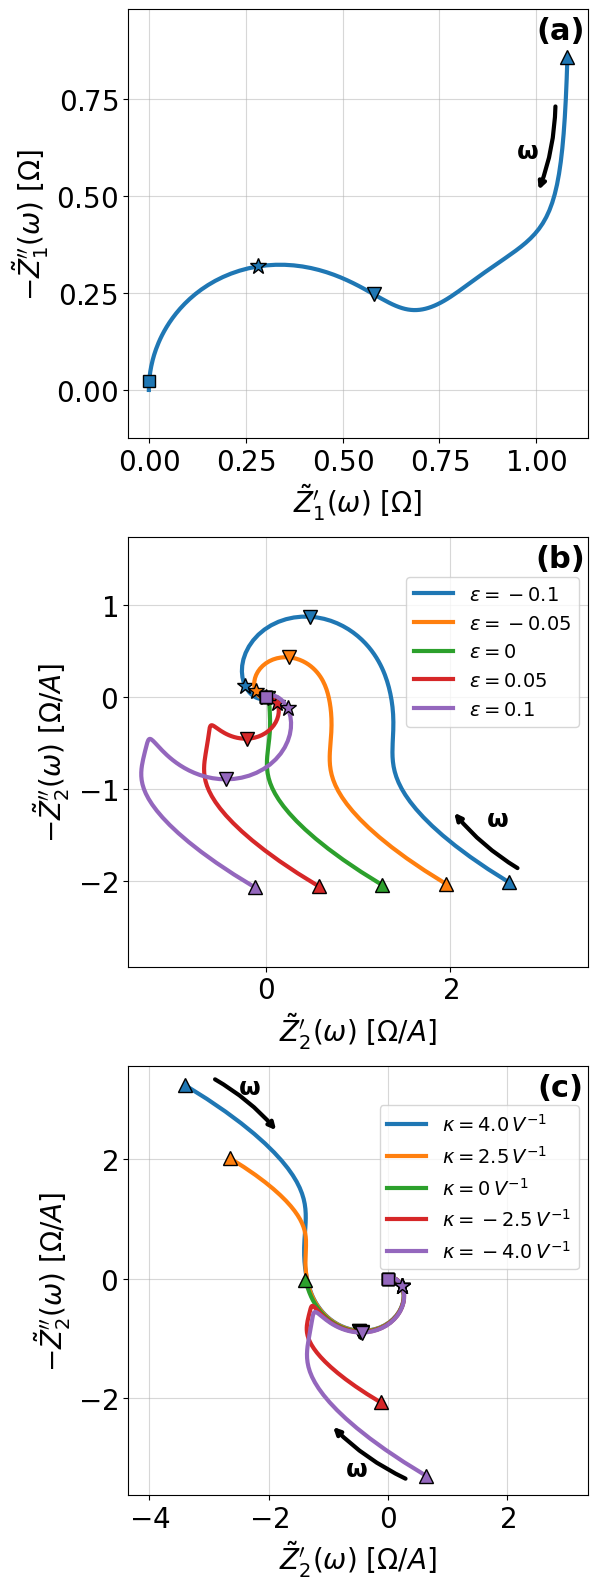

In [7]:
fig, ax = plt.subplots(3,1,figsize=(6,16))#12:6
c_code=0
Rpore = 0.6 # Ohms
Rct = 0.6 # Ohms
Cdl = 0.72 # F
Aw = 1.5
tauw = 300
k = -2.5;
point_RC = np.array([1/(Rct*Cdl*2*np.pi)])

f = np.geomspace(1e-3, 1e4, num=200, endpoint=True)


circ_str_1 = 'R0-RCD0'
circ_str_2 = 'R0-RCDn0'

circuit_1 = CustomCircuit(circ_str_1, constants={'R0':0,'RCD0_0':Rct,'RCD0_1':Cdl,'RCD0_2':Aw,'RCD0_3':tauw})
Z1 = circuit_1.predict(f)

Z1p1 = circuit_1.predict(point_1)
Z1p2 = circuit_1.predict(point_2)
Z1p3 = circuit_1.predict(point_3)
Z1p4 = circuit_1.predict(point_RC)

plot_first(ax[0], Z1, fmt='-',lw=3)
plot_first(ax[0], Z1p1, fmt='^',ms=10,color='C'+str(c_code),markeredgecolor='k')
plot_first(ax[0], Z1p2, fmt='v',ms=10,color='C'+str(c_code),markeredgecolor='k')
plot_first(ax[0], Z1p3, fmt='s',ms=8,color='C'+str(c_code),markeredgecolor='k')
plot_first(ax[0], Z1p4, fmt='*',ms=12,color='C'+str(c_code),markeredgecolor='k')

x1, y1 = 1, 0.5
x2, y2 = 1.05, 0.75
x3, y3 = 0.95, .6
connectionstyle="arc3,rad=-0.1"
arrow(ax[0],x1,y1,x2,y2,x3,y3,connectionstyle)

for i in range (-10,11,5):
    e=i/100
    circuit_2 = CustomCircuit(circ_str_2, constants={'R0':0,'RCDn0_0':Rct,'RCDn0_1':Cdl,'RCDn0_2':Aw,'RCDn0_3':tauw,'RCDn0_4':k,'RCDn0_5':e})
    Z2 = circuit_2.predict(f)
    if e == 0:
        e=int(e)

    plot_second(ax[1], Z2, fmt='-',lw=3,label=r"$ ε = "+str(e)+"$")
    Z2p1 = circuit_2.predict(point_1)
    Z2p2 = circuit_2.predict(point_2)
    Z2p3 = circuit_2.predict(point_3)
    Z2p4 = circuit_2.predict(point_RC)

    plot_second(ax[1], Z2p1, fmt='^',ms=10,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[1], Z2p2, fmt='v',ms=10,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[1], Z2p3, fmt='s',ms=8,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[1], Z2p4, fmt='*',ms=12,color='C'+str(c_code),markeredgecolor='k')
    c_code +=1
ax[1].set_xlim([-1.5,3.6])
x1, y1 = 2, -1.2
x2, y2 = 2.8, -1.9
x3, y3 = 2.4, -1.4
connectionstyle="arc3,rad=-0.1"
arrow(ax[1],x1,y1,x2,y2,x3,y3,connectionstyle)
ax[1].set_xlim([-2,4])
ax[1].legend(fontsize=14,loc='upper right',bbox_to_anchor=(1, 0.93))
c_code = 0
km = [-4/2.5,-1,0,1,4/2.5]
for i in range (0,5):
    circuit_2 = CustomCircuit(circ_str_2, constants={'R0':0,'RCDn0_0':Rct,'RCDn0_1':Cdl,'RCDn0_2':Aw,'RCDn0_3':tauw,'RCDn0_4':k*km[i],'RCDn0_5':0.1})
    Z2 = circuit_2.predict(f)
    if km[i] == 0:
        intm = int(k*km[i])
        plot_second(ax[2], Z2, fmt='-',lw=3,label=r"$ κ = "+str(intm)+'\,'+'V^{-1}'+"$")
    else:
        plot_second(ax[2], Z2, fmt='-',lw=3,label=r"$ κ = "+str(k*km[i])+'\,'+'V^{-1}'+"$")

    
    Z2p1 = circuit_2.predict(point_1) 
    Z2p2 = circuit_2.predict(point_2)
    Z2p3 = circuit_2.predict(point_3)
    Z2p4 = circuit_2.predict(point_RC)

    plot_second(ax[2], Z2p1, fmt='^',ms=10,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[2], Z2p2, fmt='v',ms=10,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[2], Z2p3, fmt='s',ms=8,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[2], Z2p4, fmt='*',ms=12,color='C'+str(c_code),markeredgecolor='k')

    c_code +=1
ax[2].set_xlim([-6,5])

x1, y1 = -1.8, 2.4
x2, y2 = -3, 3.4
x3, y3 = -2.5, 3.1
connectionstyle="arc3,rad=-0.1"
arrow(ax[2],x1,y1,x2,y2,x3,y3,connectionstyle)
arrow(ax[2],-x1-2.8,-y1,-x2-2.6,-y2,-x3-3.2,-y3-0.2,connectionstyle)


ax[2].legend(fontsize=14,loc='upper right',bbox_to_anchor=(1, 0.93))
ax[0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0].transAxes, size=22, weight='bold')
ax[1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[1].transAxes, size=22, weight='bold')
ax[2].text(0.94, 0.95, '(c)',horizontalalignment='center',verticalalignment='center', transform=ax[2].transAxes, size=22, weight='bold')

plt.tight_layout()
plt.show()
# fig.savefig('figures/Figure7.png',dpi=300,bbox_inches='tight')

# Figure 9. Weakly nonlinear response of a porous insertion electrode with bounded solid diffusion

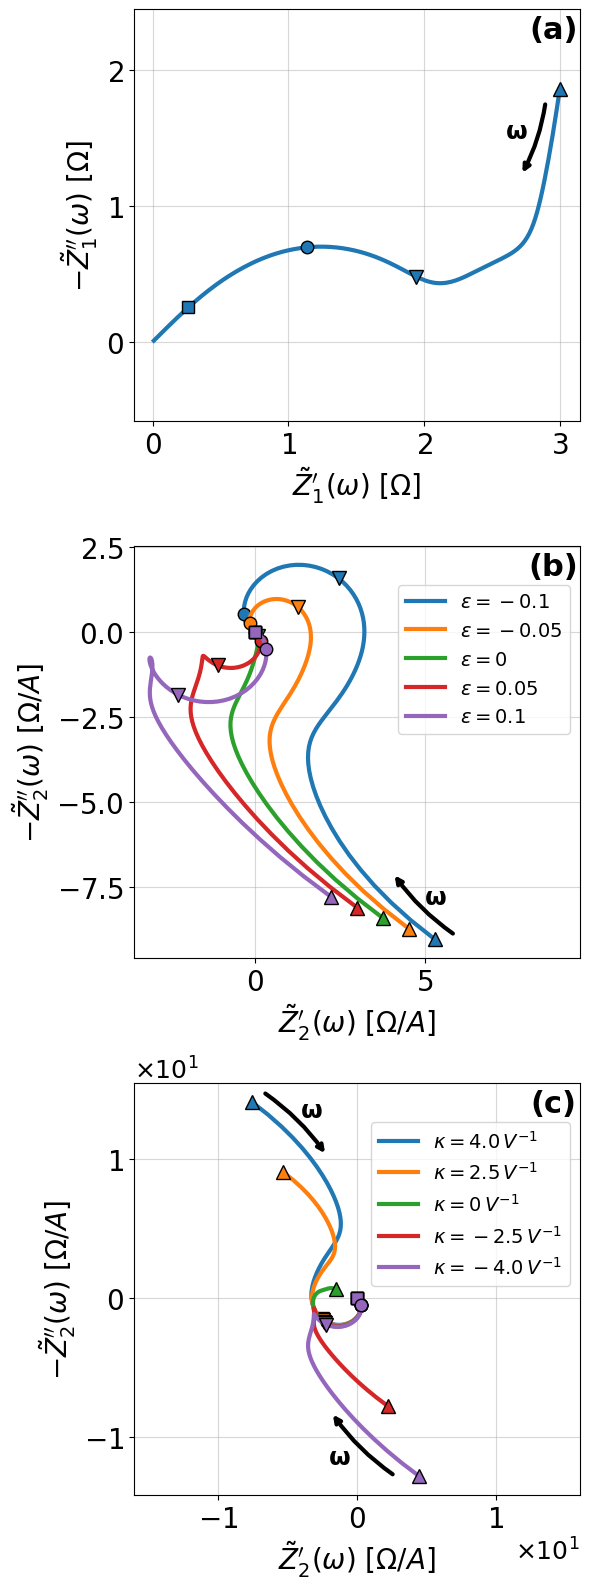

In [8]:
fig, ax = plt.subplots(3,1,figsize=(6,16))#12:6
f = np.geomspace(1e-3, 1e4, num=200, endpoint=True)

c_code = 0 
Rpore = 6 # Ohms
Rct = 0.6 # Ohms
Cdl = 0.72 # F
## planar
Aw = 2
tauw = 200
k = -2.5;

point_RC = np.array([np.sqrt(3)/(Rct*Cdl*2*np.pi)])

circ_str_3 = 'R0-TDP0'
circ_str_4 = 'R0-TDPn0'
circuit_1 = CustomCircuit(circ_str_3, constants={'R0':0,'TDP0_0':Rpore,'TDP0_1':Rct,'TDP0_2':Cdl,'TDP0_3':Aw,'TDP0_4':tauw})
Z1 = circuit_1.predict(f)
## Figure (a)
#####################################

Z1p1 = circuit_1.predict(point_1)
Z1p2 = circuit_1.predict(point_2)
Z1p3 = circuit_1.predict(point_3)
Z1p4 = circuit_1.predict(point_RC)

plot_first(ax[0], Z1, fmt='-',lw=3)
plot_first(ax[0], Z1p1, fmt='^',ms=10,color='C'+str(c_code),markeredgecolor='k')
plot_first(ax[0], Z1p2, fmt='v',ms=10,color='C'+str(c_code),markeredgecolor='k')
plot_first(ax[0], Z1p3, fmt='s',ms=8,color='C'+str(c_code),markeredgecolor='k')
plot_first(ax[0], Z1p4, fmt='o',ms=9,color='C'+str(c_code),markeredgecolor='k')
x1, y1 = 2.7, 1.2
x2, y2 = 2.9, 1.8
x3, y3 = 2.6, 1.5
connectionstyle="arc3,rad=-0.1"
arrow(ax[0],x1,y1,x2,y2,x3,y3,connectionstyle)
## Figure (b)
#####################################
for i in range (-10,11,5):
    e=i/100
    circuit_2 = CustomCircuit(circ_str_4, constants={'R0':0,'TDPn0_0':Rpore,'TDPn0_1':Rct,'TDPn0_2':Cdl,'TDPn0_3':Aw,'TDPn0_4':tauw,'TDPn0_5':k,'TDPn0_6':e})
    Z2 = circuit_2.predict(f)
    if e == 0:
        e=int(e)
    plot_second(ax[1], Z2, fmt='-',lw=3,label=r"$ ε = "+str(e)+"$")
    Z2p1 = circuit_2.predict(point_1)
    Z2p2 = circuit_2.predict(point_2)
    Z2p3 = circuit_2.predict(point_3)
    Z2p4 = circuit_2.predict(point_RC)

    plot_second(ax[1], Z2p1, fmt='^',ms=10,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[1], Z2p2, fmt='v',ms=10,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[1], Z2p3, fmt='s',ms=8,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[1], Z2p4, fmt='o',ms=9,color='C'+str(c_code),markeredgecolor='k')
    c_code +=1
x1, y1 = 4, -7
x2, y2 = 6, -9
x3, y3 = 5, -8
connectionstyle="arc3,rad=-0.1"
arrow(ax[1],x1,y1,x2,y2,x3,y3,connectionstyle)
ax[1].set_xlim([-4,10])
## Figure (c)
#####################################
c_code = 0
km = [-4/2.5,-1,0,1,4/2.5]

for i in range (0,5):
    circuit_2 = CustomCircuit(circ_str_4, constants={'R0':0,'TDPn0_0':Rpore,'TDPn0_1':Rct,'TDPn0_2':Cdl,'TDPn0_3':Aw,'TDPn0_4':tauw,'TDPn0_5':k*km[i],'TDPn0_6':0.1})
    Z2 = circuit_2.predict(f)
    if km[i] == 0:
        intm = int(k*km[i])
        plot_second(ax[2], Z2, fmt='-',lw=3,label=r"$ κ = "+str(intm)+'\,'+'V^{-1}'+"$")
    else:
        plot_second(ax[2], Z2, fmt='-',lw=3,label=r"$ κ = "+str(k*km[i])+'\,'+'V^{-1}'+"$")

    Z2p1 = circuit_2.predict(point_1)
    Z2p2 = circuit_2.predict(point_2)
    Z2p3 = circuit_2.predict(point_3)
    Z2p4 = circuit_2.predict(point_RC)

    plot_second(ax[2], Z2p1, fmt='^',ms=10,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[2], Z2p2, fmt='v',ms=10,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[2], Z2p3, fmt='s',ms=8,color='C'+str(c_code),markeredgecolor='k')
    plot_second(ax[2], Z2p4, fmt='o',ms=9,color='C'+str(c_code),markeredgecolor='k')
    c_code +=1
ax[2].set_xlim([-10,10])

x1, y1 = -2, 10
x2, y2 = -7, 15
x3, y3 = -4, 13
connectionstyle="arc3,rad=-0.1"
arrow(ax[2],x1,y1,x2,y2,x3,y3,connectionstyle)
arrow(ax[2],-x1-4,-y1+2,-x2-4,-y2+2,-x3-6,-y3+1,connectionstyle)

ax[1].legend(fontsize=14,loc='upper right',bbox_to_anchor=(1, 0.93))
ax[2].legend(fontsize=14,loc='upper right',bbox_to_anchor=(1, 0.93))
# 
ax[0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0].transAxes, size=22, weight='bold')
ax[1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[1].transAxes, size=22, weight='bold')
ax[2].text(0.94, 0.95, '(c)',horizontalalignment='center',verticalalignment='center', transform=ax[2].transAxes, size=22, weight='bold')

plt.tight_layout()
plt.show()
# fig.savefig('figures/Figure9.png',dpi=300,bbox_inches='tight')

# Figure 10. Signal Parity and Second Harmonic NLEIS for Two-Electrode Cells  

In [9]:
### parameters for electrode 1
# Rpore， Rct， Cdl 
electrode_1=[0.0086,0.00214,0.390]
# Aw， τ
D1=[0.143,13595]
#κ,ε
nleis1= [39.5,0]

### parameters for electrode 2
# Rpore， Rct， Cdl 
electrode_2=[0.01978,0.00749,5.03]
# Aw， τ
D2=[0.138,3547]
#κ,ε
nleis2=[9.05,0.0598]

In [10]:

f=np.geomspace(5e-3,1e4,100)

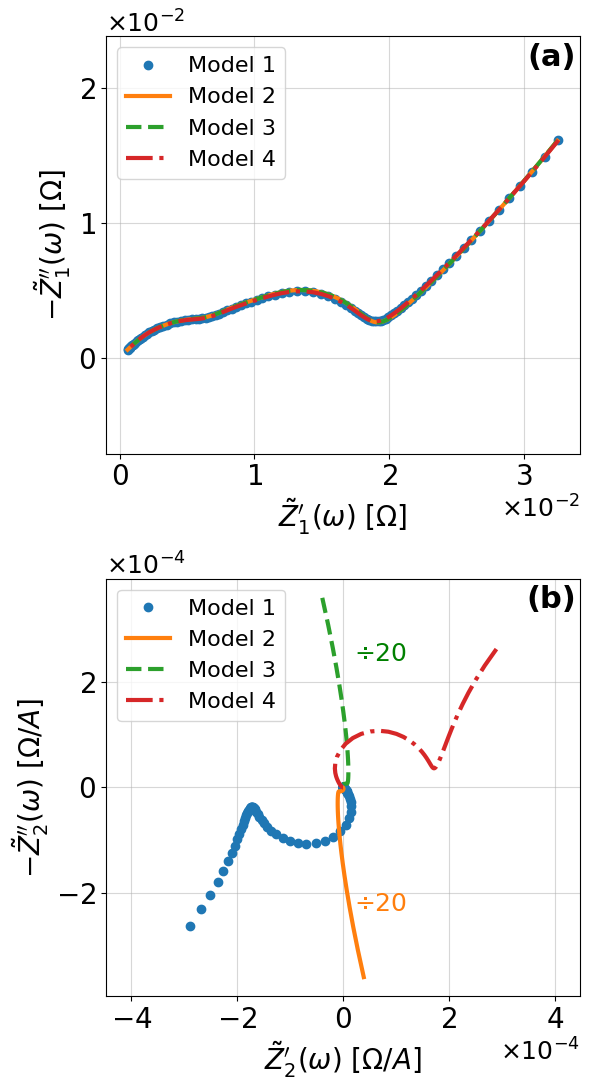

In [11]:
## Model 1
## Anode (RC): electrode 1
## Diffusion (P): D1
## NLEIS : nleis1
## Cathode (T): electrode 2
## Diffusion (P):  D2
## NLEIS : nleis2
circ_str_1 = 'TDS0-TDS1'
initial_guess_1 = np.hstack((electrode_2,D2,electrode_1,D1))
circ_str_2 = 't(TDSn0,TDSn1)'
initial_guess_2 = np.hstack((electrode_2,D2,nleis2,electrode_1,D1,nleis1))
circuit_1 = NLEISCustomCircuit(circ_str_1, initial_guess=initial_guess_1)
circuit_2 = NLEISCustomCircuit(circ_str_2, initial_guess=initial_guess_2)

Z1a = circuit_1.predict(f)
Z2a = circuit_2.predict(f)

## Model 2
## Anode (RC): electrode 1
## Diffusion (P): D2
## NLEIS : nleis1
## Cathode (T): electrode 2
## Diffusion (P):  D1
## NLEIS : nleis2
circ_str_1 = 'TDS0-TDS1'
initial_guess_1 = np.hstack((electrode_2,D1,electrode_1,D2))
circ_str_2 = 't(TDSn0,TDSn1)'
initial_guess_2 = np.hstack((electrode_2,D1,nleis2,electrode_1,D2,nleis1))
circuit_1 = NLEISCustomCircuit(circ_str_1, initial_guess=initial_guess_1)
circuit_2 = NLEISCustomCircuit(circ_str_2, initial_guess=initial_guess_2)

Z1b = circuit_1.predict(f)
Z2b = circuit_2.predict(f)

## Model 3
## Anode (T): electrode 2
## Diffusion (P): D1
## NLEIS : nleis2
## Cathode (RC): electrode 1
## Diffusion (P):  D2
## NLEIS : nleis1
circ_str_1 = 'TDS0-TDS1'
initial_guess_1 = np.hstack((electrode_1,D2,electrode_2,D1))
circ_str_2 = 't(TDSn0,TDSn1)'
initial_guess_2 = np.hstack((electrode_1,D2,nleis1,electrode_2,D1,nleis2))
circuit_1 = NLEISCustomCircuit(circ_str_1, initial_guess=initial_guess_1)
circuit_2 = NLEISCustomCircuit(circ_str_2, initial_guess=initial_guess_2)

Z1c = circuit_1.predict(f)
Z2c = circuit_2.predict(f)

## Model 4
## Anode (T): electrode 2
## Diffusion (P): D2
## NLEIS : nleis2
## Cathode (RC): electrode 1
## Diffusion (P):  D1
## NLEIS : nleis1

circ_str_1 = 'TDS0-TDS1'
initial_guess_1 = np.hstack((electrode_1,D1,electrode_2,D2))
circ_str_2 = 't(TDSn1,TDSn0)'
initial_guess_2 = np.hstack((electrode_1,D1,nleis1,electrode_2,D2,nleis2))
circuit_1 = NLEISCustomCircuit(circ_str_1, initial_guess=initial_guess_1)
circuit_2 = NLEISCustomCircuit(circ_str_2, initial_guess=initial_guess_2)

Z1d = circuit_1.predict(f)
Z2d = circuit_2.predict(f)

fig, ax = plt.subplots(2,1,figsize=(6,11))#12:6
plot_first(ax[0], Z1a, fmt='o',lw=3)
plot_second(ax[1], Z2a, fmt='o',lw=3)
plot_first(ax[0], Z1b, fmt='-',lw=3)
plot_second(ax[1], Z2b/20, fmt='-',lw=3)
plot_first(ax[0], Z1c, fmt='--',lw=3)
plot_second(ax[1], Z2c/20, fmt='--',lw=3)
plot_first(ax[0], Z1d, fmt='-.',lw=3)
plot_second(ax[1], Z2d, fmt='-.',lw=3)
ax[0].legend(['Model 1','Model 2', 'Model 3', 'Model 4'],fontsize=16)
ax[1].legend(['Model 1','Model 2', 'Model 3', 'Model 4'],fontsize=16)
ax[0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0].transAxes, size=22, weight='bold')
ax[1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[1].transAxes, size=22, weight='bold')
ax[1].text(0.58, 0.22, r'$\div 20$',horizontalalignment='center',verticalalignment='center', transform=ax[1].transAxes, size=18, weight='bold',color='C1')
ax[1].text(0.58, 0.82, r'$\div 20$',horizontalalignment='center',verticalalignment='center', transform=ax[1].transAxes, size=18, weight='bold',color='g')

plt.tight_layout()
plt.show()
# fig.savefig('figures/Figure10.png',dpi=300,bbox_inches='tight')


# Supplementary Figure. Convergence of Transmission line model to porous electrode model

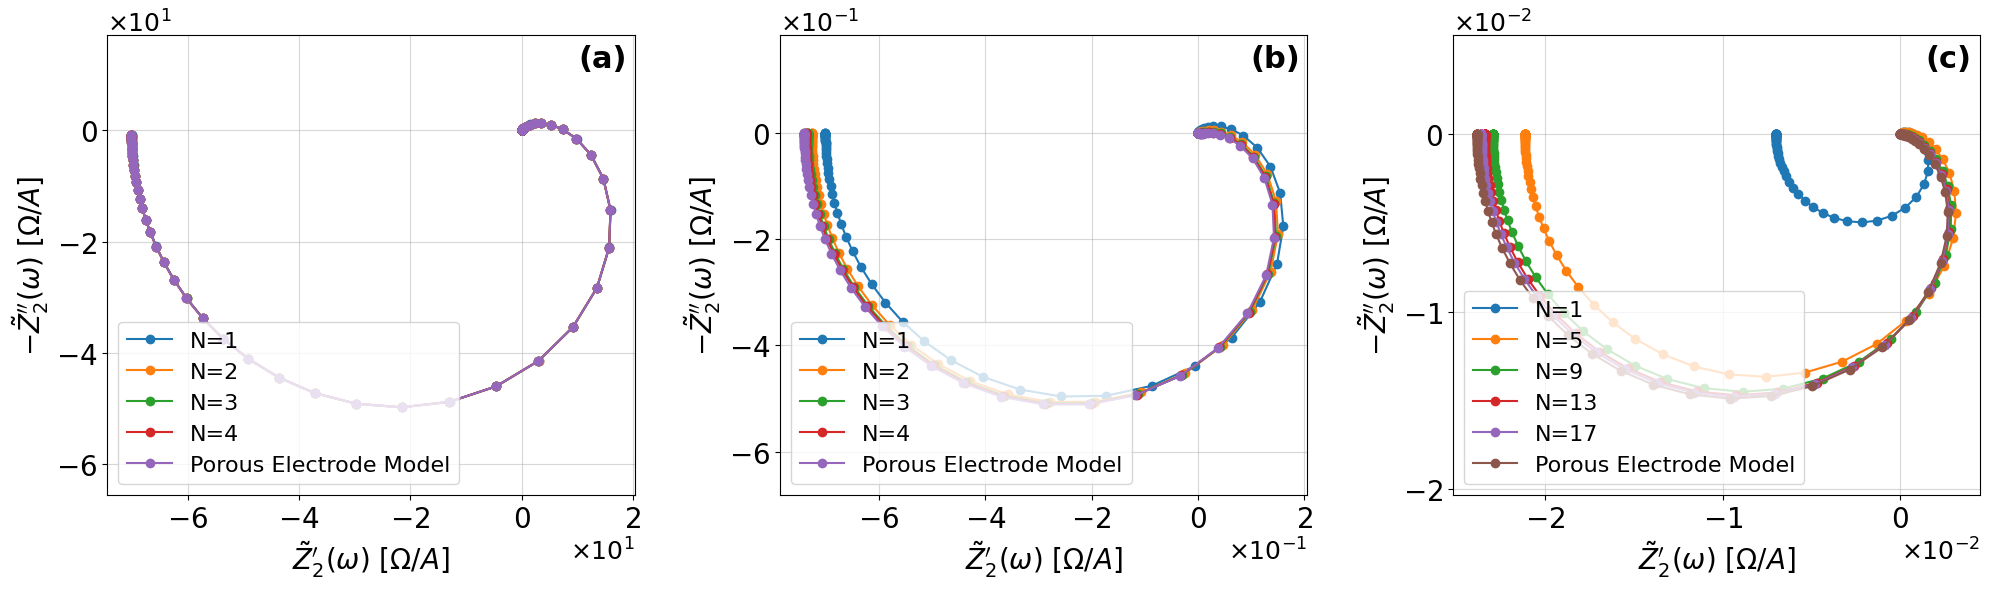

In [12]:
fig, ax = plt.subplots(1,3,figsize=(20,6))
## (a) Rpore < Rct ~ 10 times rpore
circ_str_1='Tsn'
circ_str_2='TPOn'
freq=np.geomspace(0.0001, 100, num=100, endpoint=True)

Rpore = 0.6 # Ohms
Rct = Rpore*10 # Ohms
Cdl = 0.72 # F

e=0.05

initial_guess = [Rpore,Rct,Cdl,e]
initial_guess_2 = [Rpore,Rct,Cdl,e]
circuit_2 = CustomCircuit(circ_str_2, initial_guess=initial_guess_2)
Z2 = circuit_2.predict(freq)
for i in range(1,5,1):
    circuit = CustomCircuit(circ_str_1, initial_guess=initial_guess,constants={'Tsn_3':i})
    Z2_T = circuit.predict(freq)
    plot_second(ax[0], Z2_T, fmt='-o',label='N='+str(i))

plot_second(ax[0], Z2, fmt='-o',label='Porous Electrode Model')
ax[0].text(0.94, 0.95, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax[0].transAxes, size=22, weight='bold')
ax[0].legend(loc='lower left',fontsize=16)

## (b) Rpore = Rct

circ_str_1='Tsn'
circ_str_2='TPOn'
freq=np.geomspace(0.0001, 100, num=100, endpoint=True)

Rpore = 0.6 # Ohms
Rct = 0.6 # Ohms
Cdl = 0.72 # F



initial_guess = [Rpore,Rct,Cdl,e]
initial_guess_2 = [Rpore,Rct,Cdl,e]
circuit_2 = CustomCircuit(circ_str_2, initial_guess=initial_guess_2)
Z2 = circuit_2.predict(freq)
for i in range(1,5,1):
    circuit = CustomCircuit(circ_str_1, initial_guess=initial_guess,constants={'Tsn_3':i})
    Z2_T = circuit.predict(freq)
    plot_second(ax[1], Z2_T, fmt='-o',label='N='+str(i))

plot_second(ax[1], Z2, fmt='-o',label='Porous Electrode Model')
ax[1].text(0.94, 0.95, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax[1].transAxes, size=22, weight='bold')

ax[1].legend(loc='lower left',fontsize=16)

## (c) Rpore > Rct ~ 0.1*Rpore

circ_str_1='Tsn'
circ_str_2='TPOn'
freq=np.geomspace(0.0001, 100, num=100, endpoint=True)

Rpore = 0.6 # Ohms
Rct = Rpore*0.1 # Ohms
Cdl = 0.72 # F

initial_guess = [Rpore,Rct,Cdl,e]
initial_guess_2 = [Rpore,Rct,Cdl,e]
circuit_2 = CustomCircuit(circ_str_2, initial_guess=initial_guess_2)
Z2 = circuit_2.predict(freq)
for i in range(1,20,4):
    circuit = CustomCircuit(circ_str_1, initial_guess=initial_guess,constants={'Tsn_3':i})
    Z2_T = circuit.predict(freq)
    plot_second(ax[2], Z2_T, fmt='-o',label='N='+str(i))

plot_second(ax[2], Z2, fmt='-o',label='Porous Electrode Model')
ax[2].text(0.94, 0.95, '(c)',horizontalalignment='center',verticalalignment='center', transform=ax[2].transAxes, size=22, weight='bold')

ax[2].legend(loc='lower left',fontsize=16)

plt.tight_layout()
plt.show()
# fig.savefig('figures/FigureSI.png',dpi=300,bbox_inches='tight')
